# Aerofit Customer Profile Analysis

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

## Business Problem

The market research team at Aerofit wants to  __*identify the characteristics of the target audience for each type of treadmill*__ offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characterstics.

- Create a customer profile for each Aerofit treadmill product by developing appropriate tables and charts.
- Construct two-way contingency tables and compute tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

_The dataset contains three months of data for three treadmills from the product portfolio_
The product codes are
- KP281 - which is an entry-level treadmill that sells for $1,500
- KP481 - which the mid-level treadmill that sells for $1,750
- KP781 - which the high-end most advanced treadmill that sells for $2,500

## Basic Attributes

### Import all the required libraies and the dataset.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\v-pirlapati\AppData\Local\Temp\ipykernel_540\3064458193.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Import dataset
Aerofit = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')
Aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
#Creating a copy of the dataset for working
df = Aerofit.copy()

### Inferring the structure & characteristics of the dataset

In [4]:
# Shape and dimensions
print("Shape of the dataset: ",df.shape,"\n", "and the dimension of the dataset is: ",df.ndim)

Shape of the dataset:  (180, 9) 
 and the dimension of the dataset is:  2


In [5]:
# information regarding the data type of each column in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
# Fetching the descriptive statistics of the numerical / continous data
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
# Fetching the descriptive statistics of the Categorical data
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [8]:
# identifying the missing values in the dataset
for i in df.columns:
    print(i,":",df[i].isnull().sum())

Product : 0
Age : 0
Gender : 0
Education : 0
MaritalStatus : 0
Usage : 0
Fitness : 0
Income : 0
Miles : 0


In [9]:
df.any().isnull()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

We can notice from the above analysis that the dataset is consisting of a total of 180 entries. Each row provides information on the customer who purchased the product from the protfolio.

- As part of basis statistical data inferred from the dataset
the average **_age_** of the customer base is **28.7** years and the median at 50% quartile is **26** years.
- Most of the **_users_** also happens to be **male** with 104 out of the 180 customer records.
- The average **education** in years is **15.5** years with minimum years of education being 12 years and maximum being 21 years and median 50% quartile lying at **16** years.
- Most of the customers are partnered which is 107 out of the 180 customers which around 59% percantage.
- We can also notice that the average **usages per week** by a customer is around **~3 (3.45) times**, the minimum usage beign 2 times and maximim being 7 times.
- At the same time the number of **miles** covered on average is **103.19** the minimum covered standing at 21 and maximum being 360 miles while median is at 94 miles.
- We can notice that here the **user** is having a **rating** of **3.3** with respect to their fitness levels while the min and max being 1 and 5 respectively with median being 3.
- The **average income** of the customer is around **5371.577**. The minimum salary of the user base is 29562 and maximum being 104,581 while median income is 50,596.

### Non - Graphical Analysis

In [10]:
# Use value_counts() to observe the distribution of the target variable 'Product Purchased'
print("Distribution of Products Purchased:",df['Product'].value_counts(),"\n")

# Check unique attributes of categorical variables
print("Unique Marital Statuses:", df['MaritalStatus'].unique())
print("Unique Gender:", df['Gender'].unique(),"\n")

# The disstrubution of the target variable MaritalStatus, Gender
print("Distribution of Marital Status:",df['MaritalStatus'].value_counts(),"\n")
print("Distribution of Gender:",df['Gender'].value_counts(),"\n")


Distribution of Products Purchased: Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64 

Unique Marital Statuses: ['Single' 'Partnered']
Unique Gender: ['Male' 'Female'] 

Distribution of Marital Status: MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64 

Distribution of Gender: Gender
Male      104
Female     76
Name: count, dtype: int64 



### Graphical Analysis

#### Univariate Analysis

We will do univariate analysis for the dataframe's entities.

Analysis for Numerical/ Continous variables. We can categorise the following columns under this.
- **Age** of the customer
- **Education** of the customer
- **Usage** by the customer in a week
- **Fitness** of the customer
- **Income** of the customer
- **Miles** clocked by the customer in a week

Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: count, dtype: int64


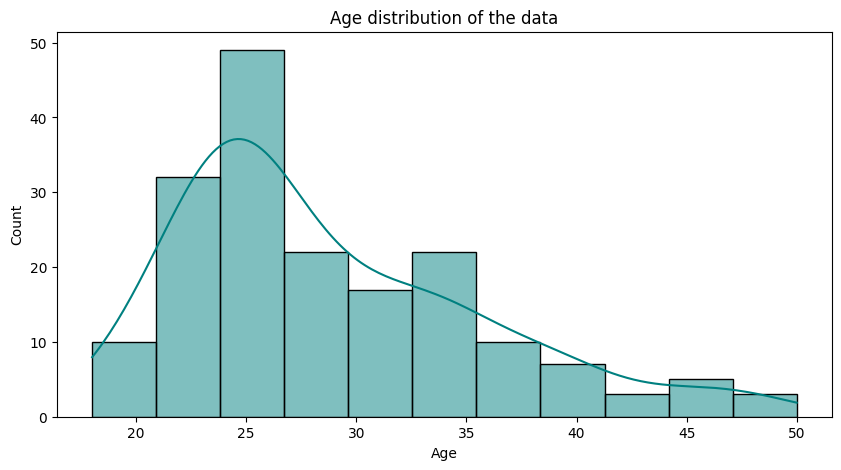

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64


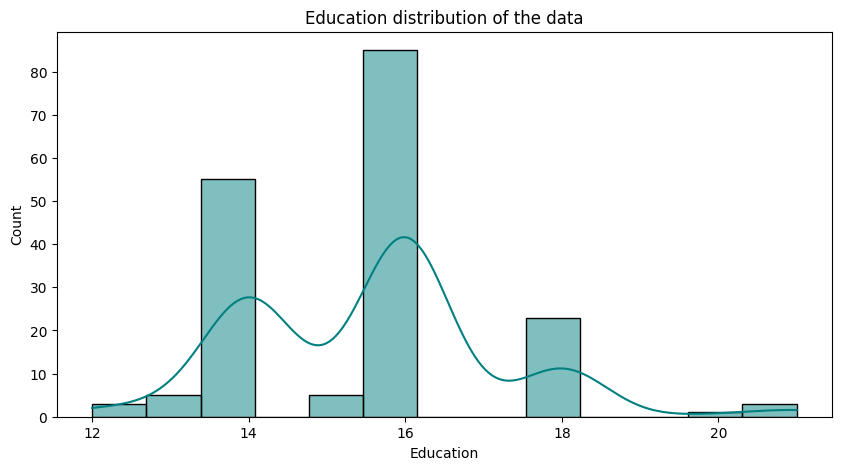

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64


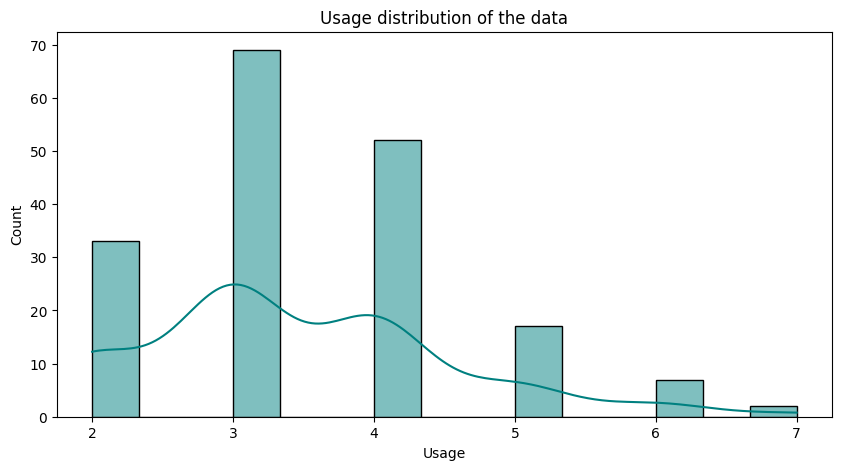

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64


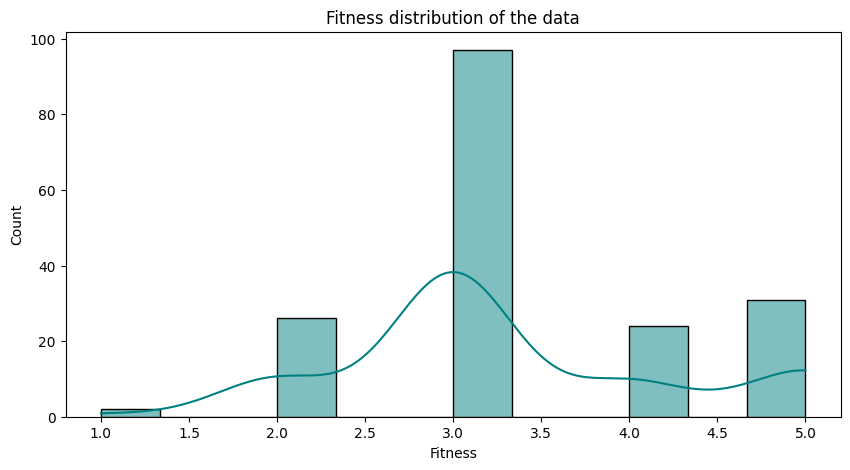

Income
45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: count, Length: 62, dtype: int64


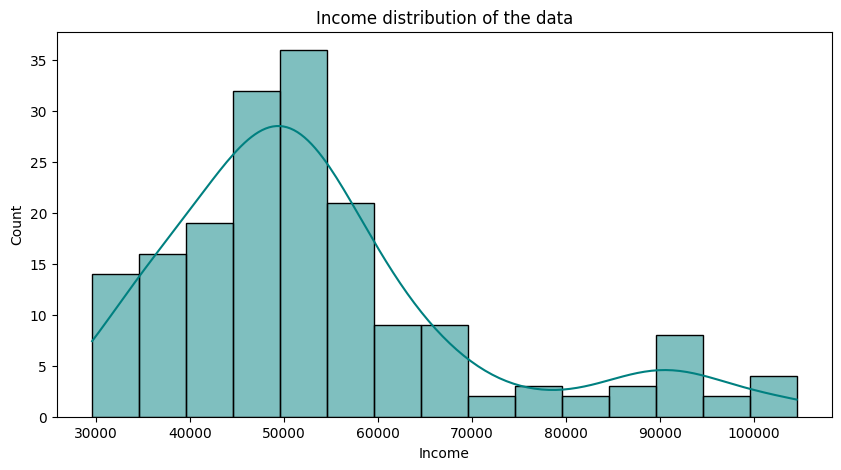

Miles
85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: count, dtype: int64


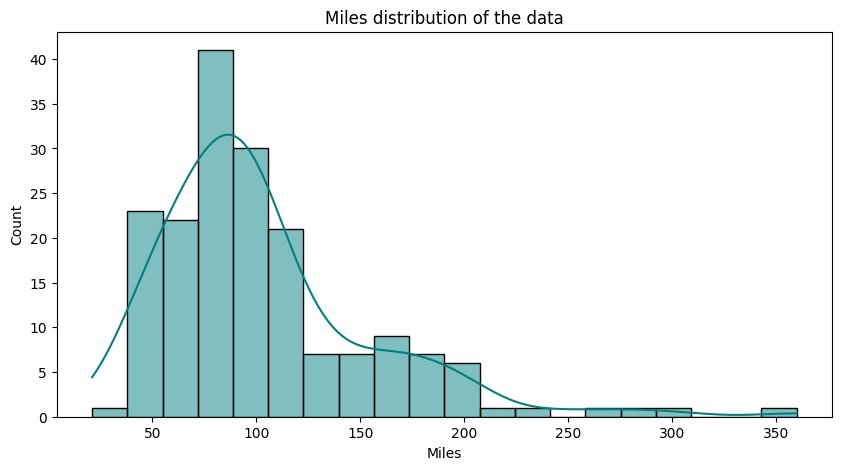

In [11]:
for i in df.columns:
    if df[i].dtype != 'object':
        title = i + " distribution of the data"
        print(df[i].value_counts())
        plt.figure(figsize=(10,5))
        plt.title(title)
        sns.histplot(df[i], kde=True, color='Teal')
        plt.show()


Graphical representation of the data univariate using countplot for the Categorical variables

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64


C:\Users\v-pirlapati\AppData\Local\Temp\ipykernel_540\2205504488.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[i], palette='viridis')
C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future versio

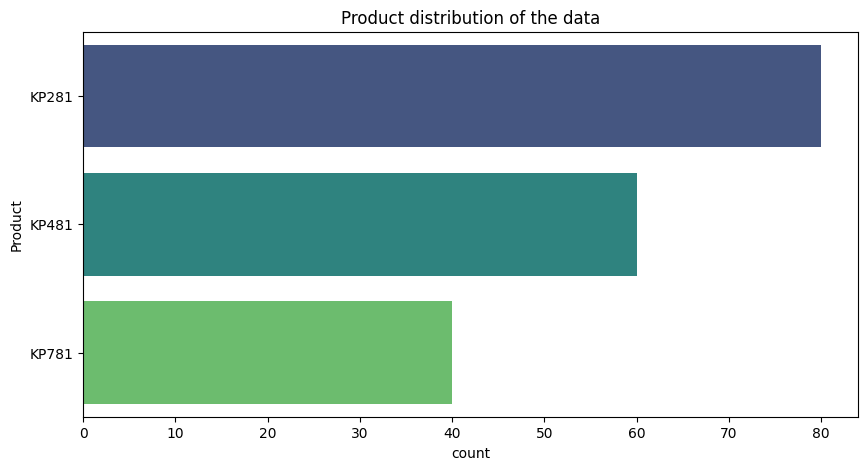

Gender
Male      104
Female     76
Name: count, dtype: int64


C:\Users\v-pirlapati\AppData\Local\Temp\ipykernel_540\2205504488.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[i], palette='viridis')
C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future versio

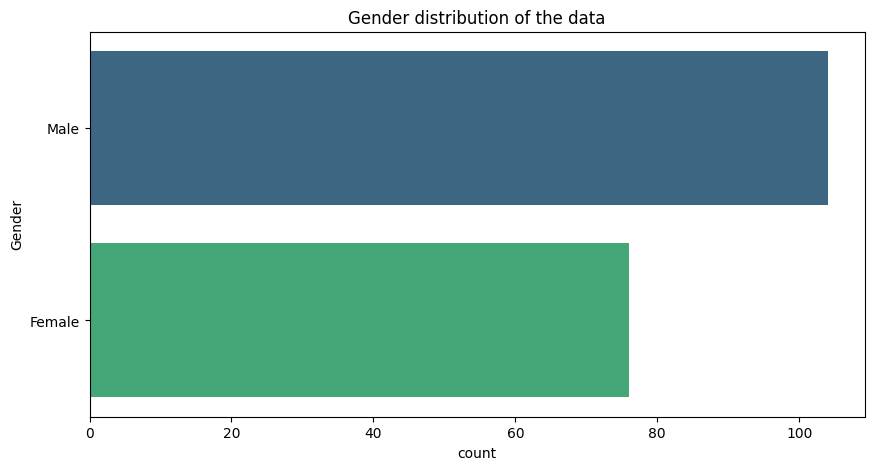

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


C:\Users\v-pirlapati\AppData\Local\Temp\ipykernel_540\2205504488.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[i], palette='viridis')
C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future versio

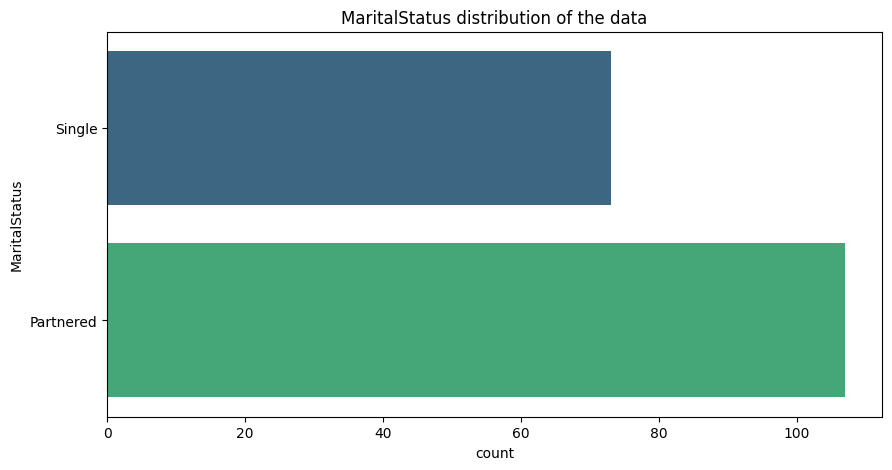

In [12]:
for i in df.columns:
    if df[i].dtype == 'object':
        title = i + " distribution of the data"
        print(df[i].value_counts())
        plt.figure(figsize=(10,5))
        plt.title(title)
        sns.countplot(df[i], palette='viridis')
        plt.show()

Based on the above analysis
- **Age** - We can notice here that the maojority of cusstomers are in the age group of  23 - 26
- **Education** - Most individuals are having a education of 14 to 16 years.
- **Usage** - The average treadmill usage is 3 to 4 times per week.
- **Fitness level** - The majority of users rate their fitness between 3 to 4 reflecting a moderate to good fitness level among the user base.
- **Income** - The moajority of the users income is concentrated between 40000 - 60000 indicating a middle income range.
- **Miles** - Many users are on an average covering 50 - 130 miles per week.

In addition to the above we can also notice that KP281 model is their most selling product in the lineup, and Male gender being the major percentage of the customers by a slight margin, and finally the customers are mojorly married (or) partnered.

#### Bivariate Analysis

Under Bivariate Analysis we are inferring the graphical represntation b/w each combination of the variable possible for the available sample data.

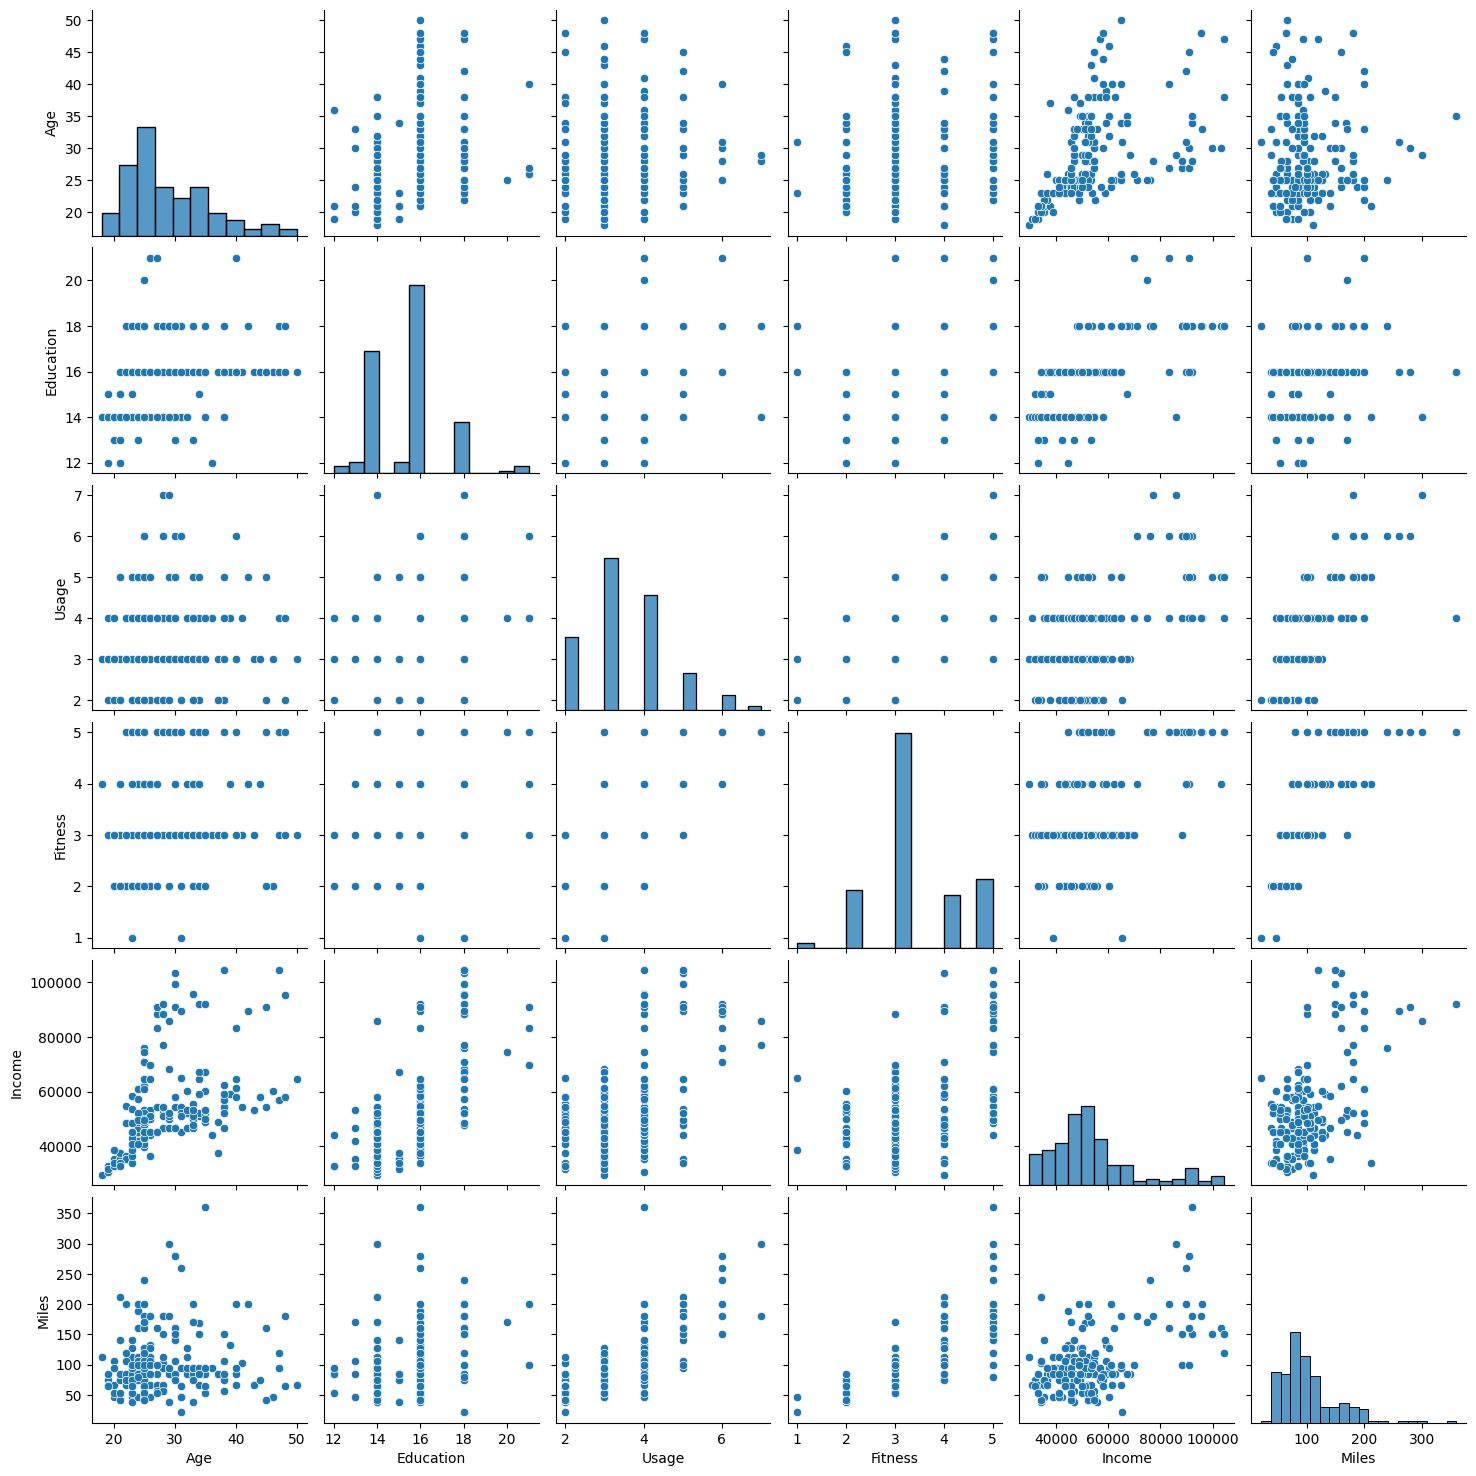

In [13]:
# Pairplot for correlation
sns.pairplot(df )
plt.show()

What can we interfere form the data thats present

- product against age group, gender, education, marital status, usage, fitness, income, miles.

Based on the observations from the pairplot data:

1. **Education - Age:**
   - Customers with 16 years of education are evenly distributed across most age groups, indicating a diverse customer base in terms of educational attainment and age.

2. **Usage - Age:**
   - The highest usage of treadmills is observed in the age groups of 20-30, suggesting that younger individuals tend to use treadmills more frequently.

3. **Fitness - Age:**
   - Customers aged between 23-35 are predominantly maintaining higher fitness levels, indicating that this age group prioritizes physical fitness and exercise.

4. **Income - Age:**
   - Customers in their late 20s to middle 40s tend to have higher incomes, suggesting that individuals in this age range are earning significantly more compared to other age groups.

5. **Income - Education:**
   - Customers with around 18 years of education tend to have higher incomes, indicating a positive correlation between educational attainment and income level.

6. **Fitness - Income:**
   - There is a trend where individuals with higher fitness levels tend to have slightly higher incomes, suggesting a potential correlation between physical fitness and financial well-being.

7. **Miles - Fitness:**
   - Customers who rate their fitness level as 5 tend to cover more miles on the treadmill, indicating that individuals with higher fitness levels engage in more extensive workout routines.

8. **Miles - Income:**
   - Majority of customers with middle-class incomes (50k - 150k) are concentrated in the range of 50 - 150 miles per week, suggesting a common usage pattern among this income group. However, there are also individuals with higher incomes covering more miles, indicating varied usage behaviors among different income levels.

These insights provide valuable information about the demographics, behavior, and preferences of customers, which can be leveraged for targeted marketing, product development, and customer segmentation strategies.

In [14]:
# creating individual dataframes for each product
KP281 = df[df['Product'] == 'KP281']
KP481 = df[df['Product'] == 'KP481']
KP781 = df[df['Product'] == 'KP781']

Detailed analysis and customer profile for individual product

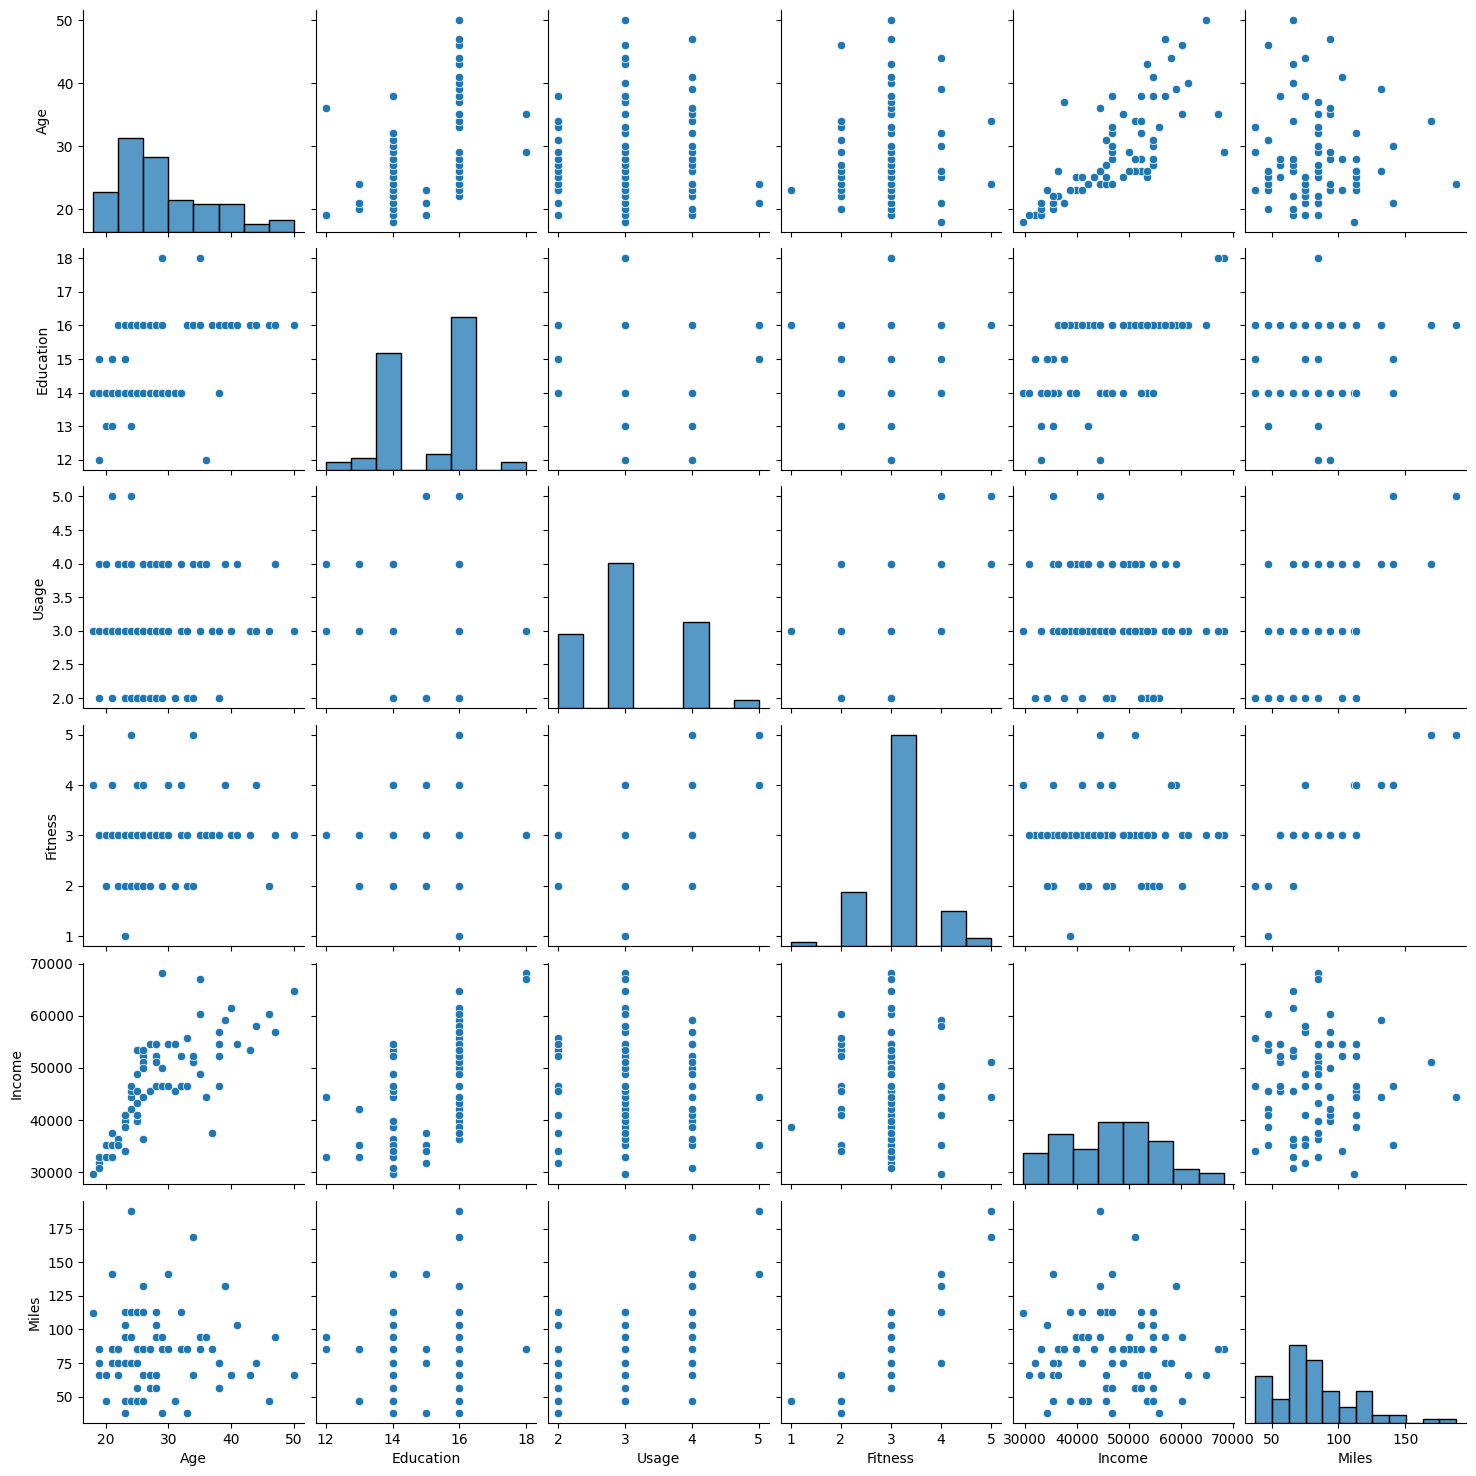

In [15]:
sns.pairplot(KP281)
plt.show()

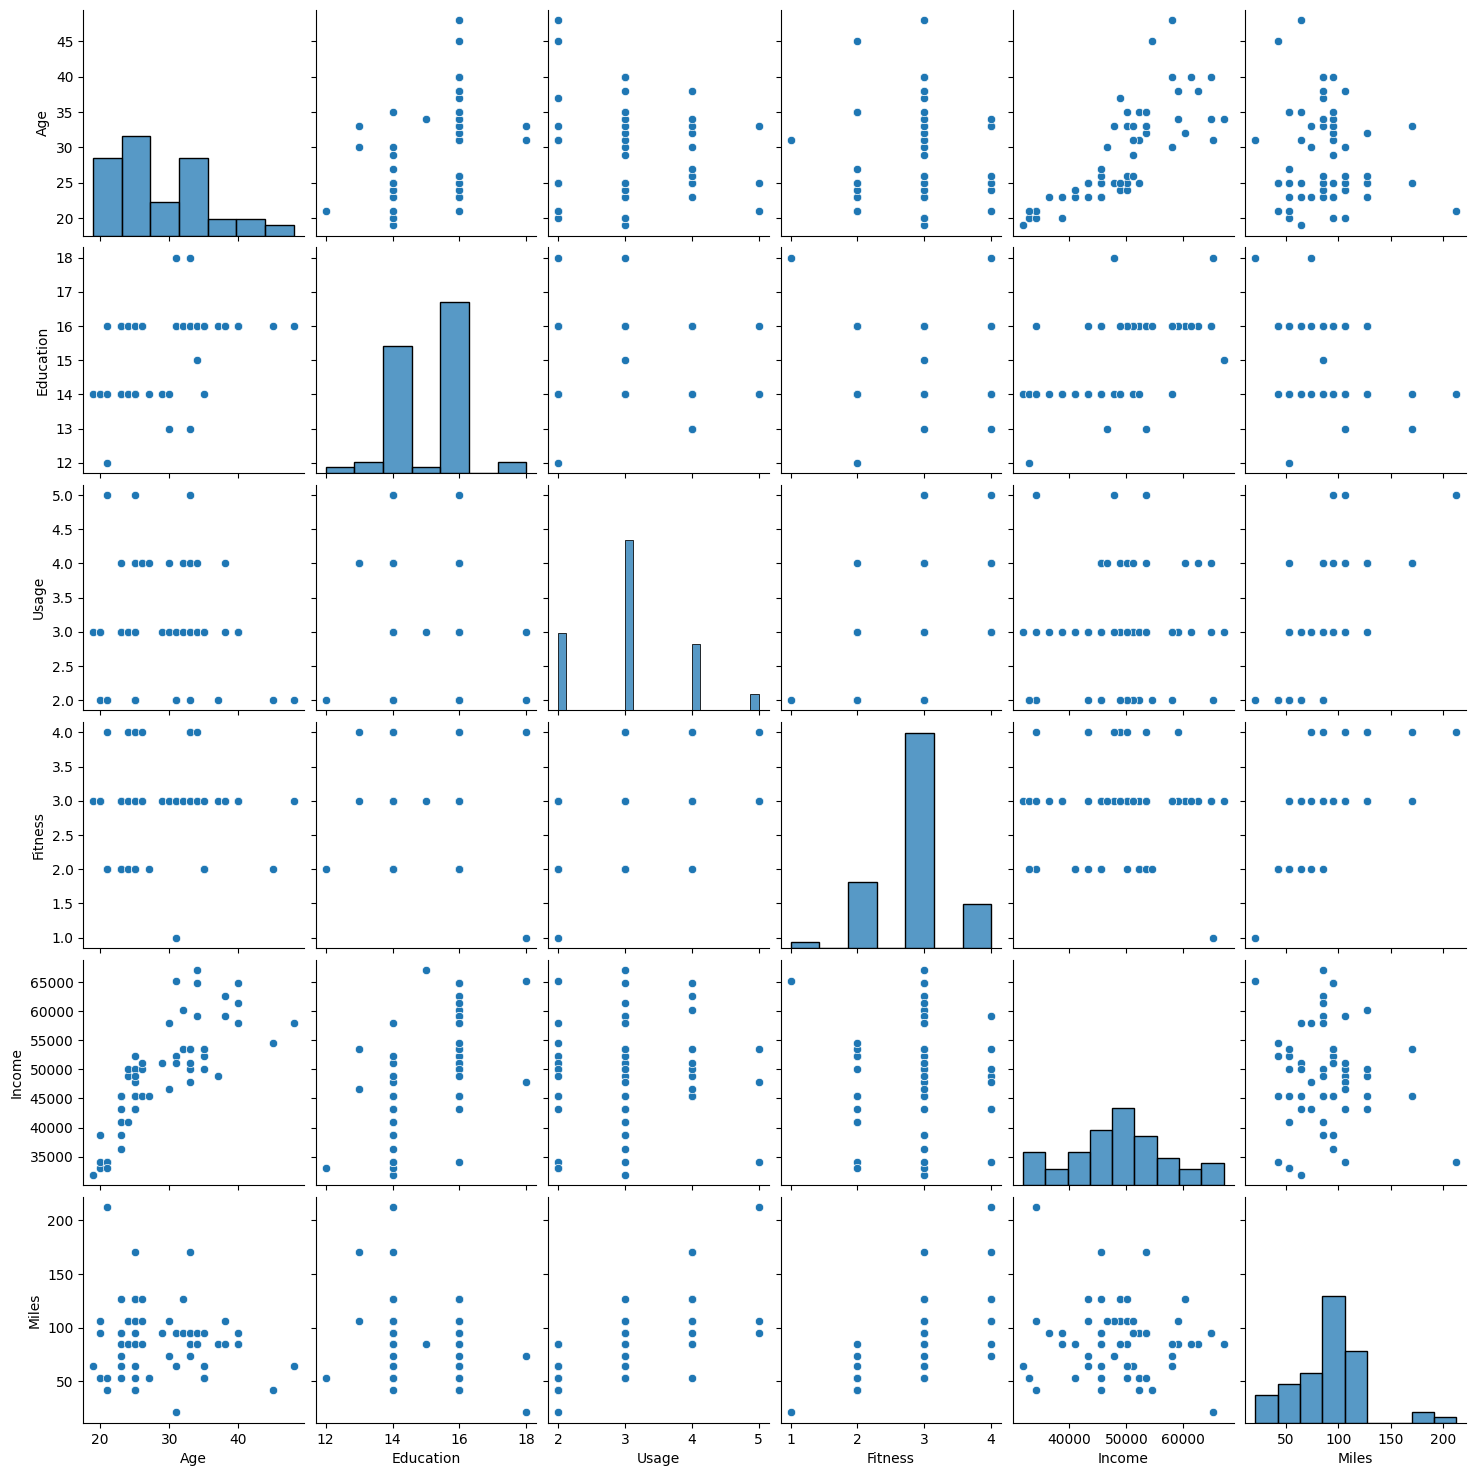

In [16]:
sns.pairplot(KP481)
plt.show()

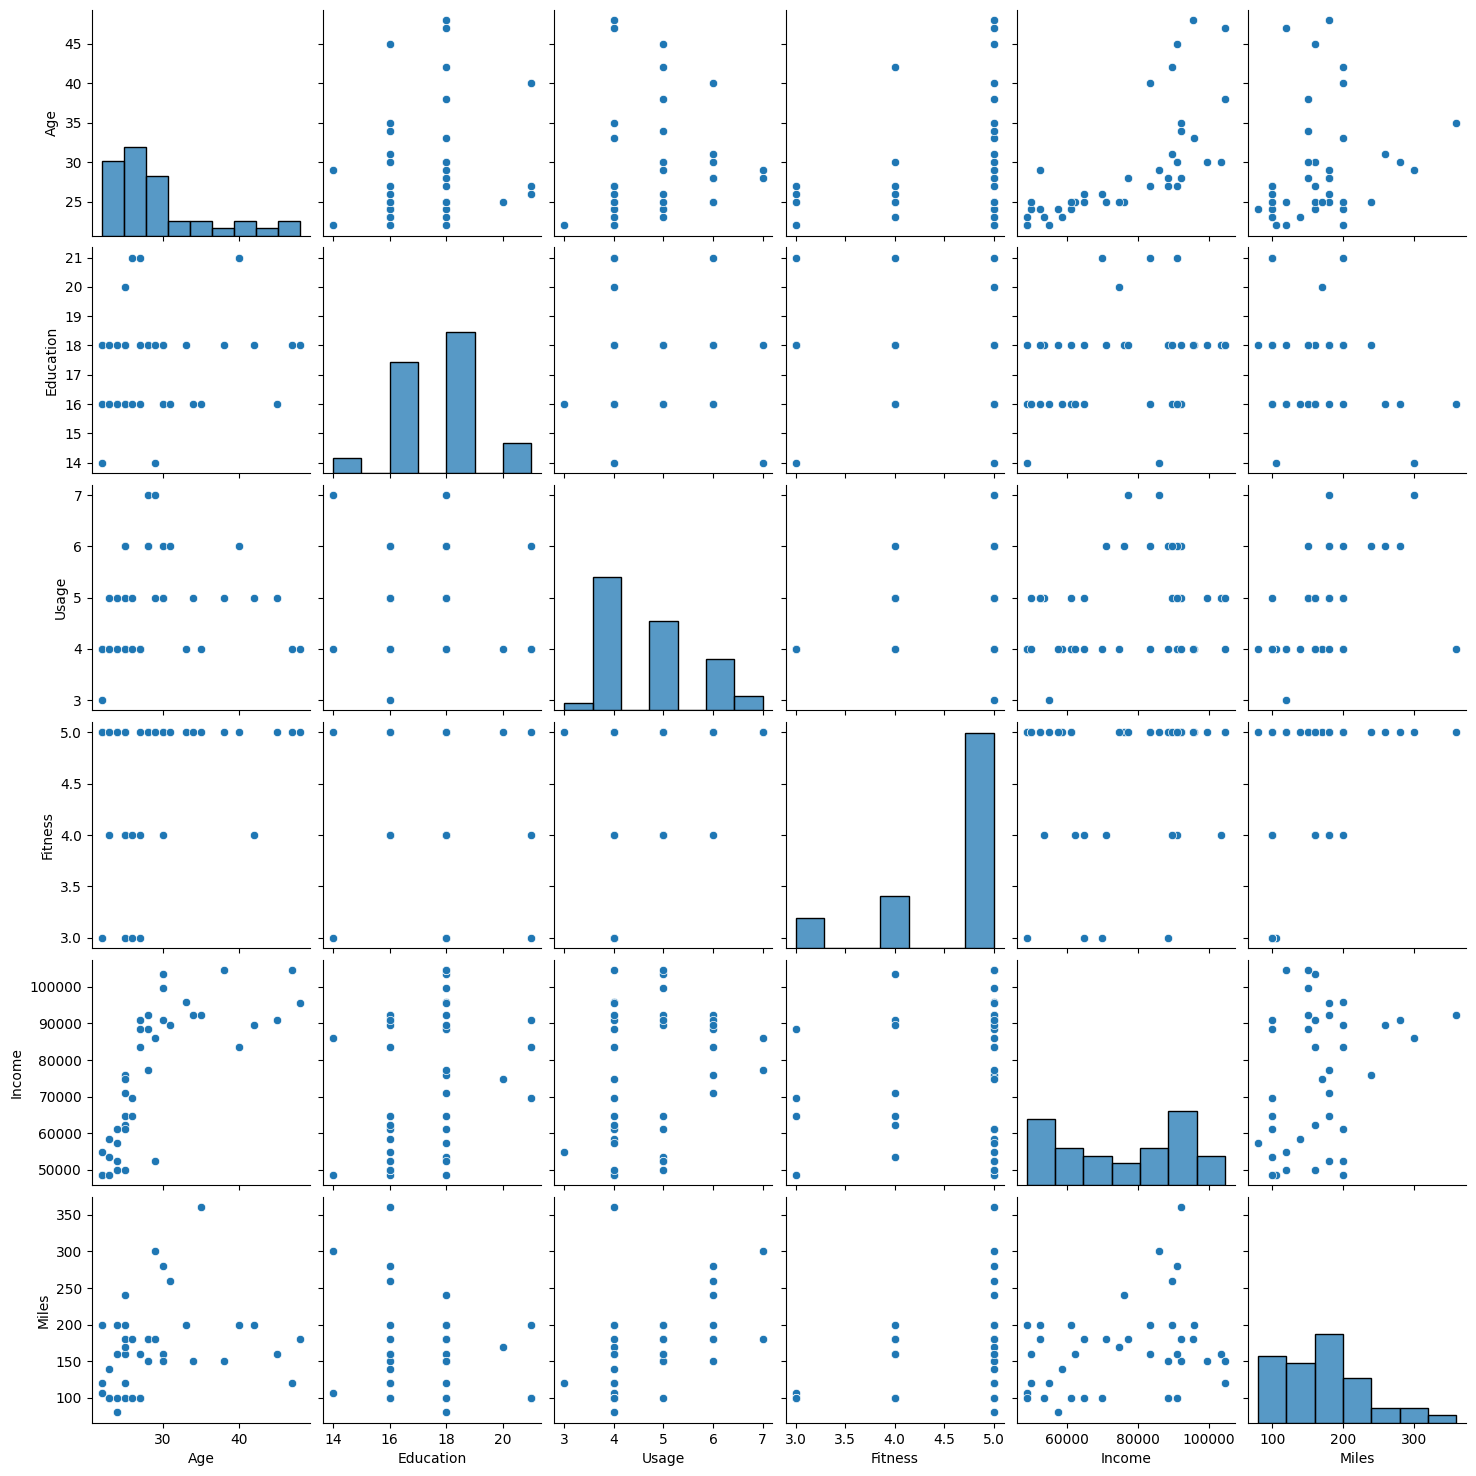

In [17]:
sns.pairplot(KP781)
plt.show()

Comparing the charts between the 3 products we can identify that Education, Usage, Income and Fitness level are major keys which is varying between each of the 3 models of the treadmills.

C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarni

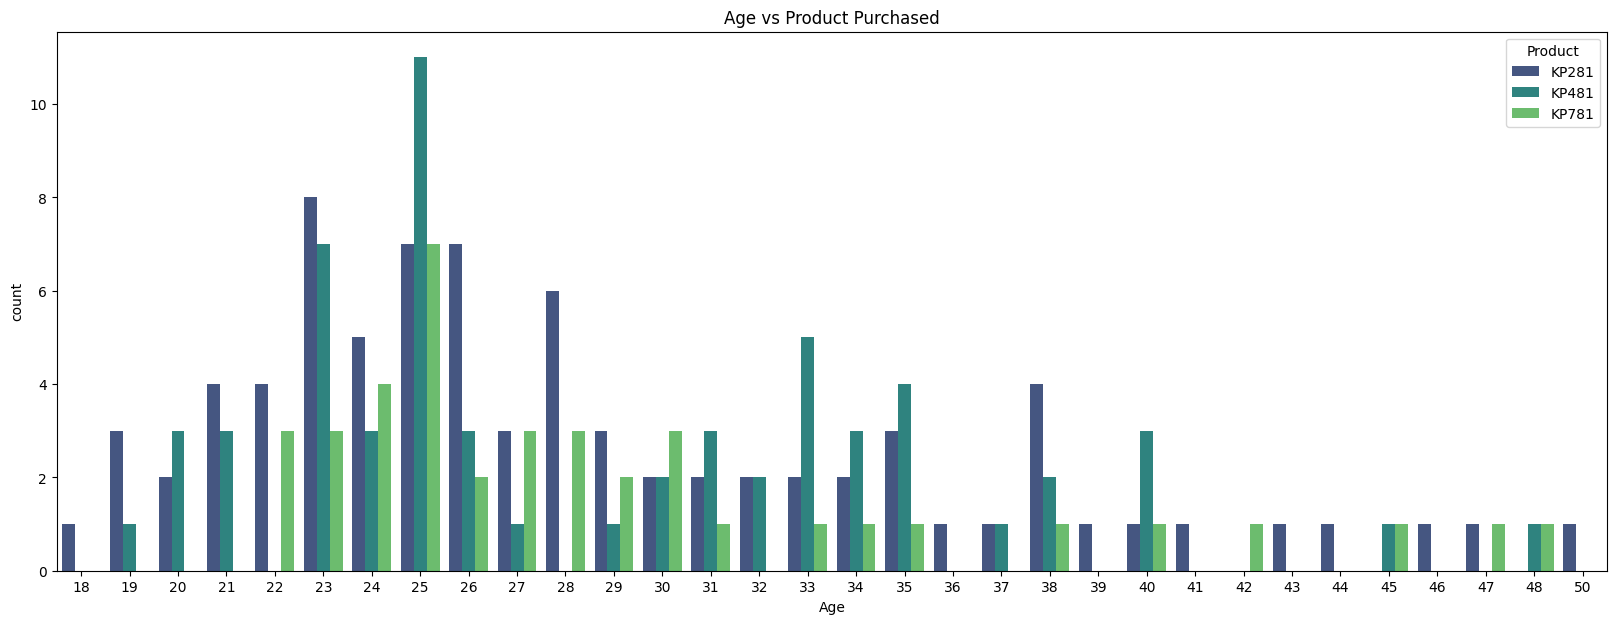

In [18]:
# bivariate plot between the age and product purchased
plt.figure(figsize=(20,7))
sns.countplot(x='Age', hue='Product', data=df, palette='viridis')
plt.title("Age vs Product Purchased")
plt.show()


C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


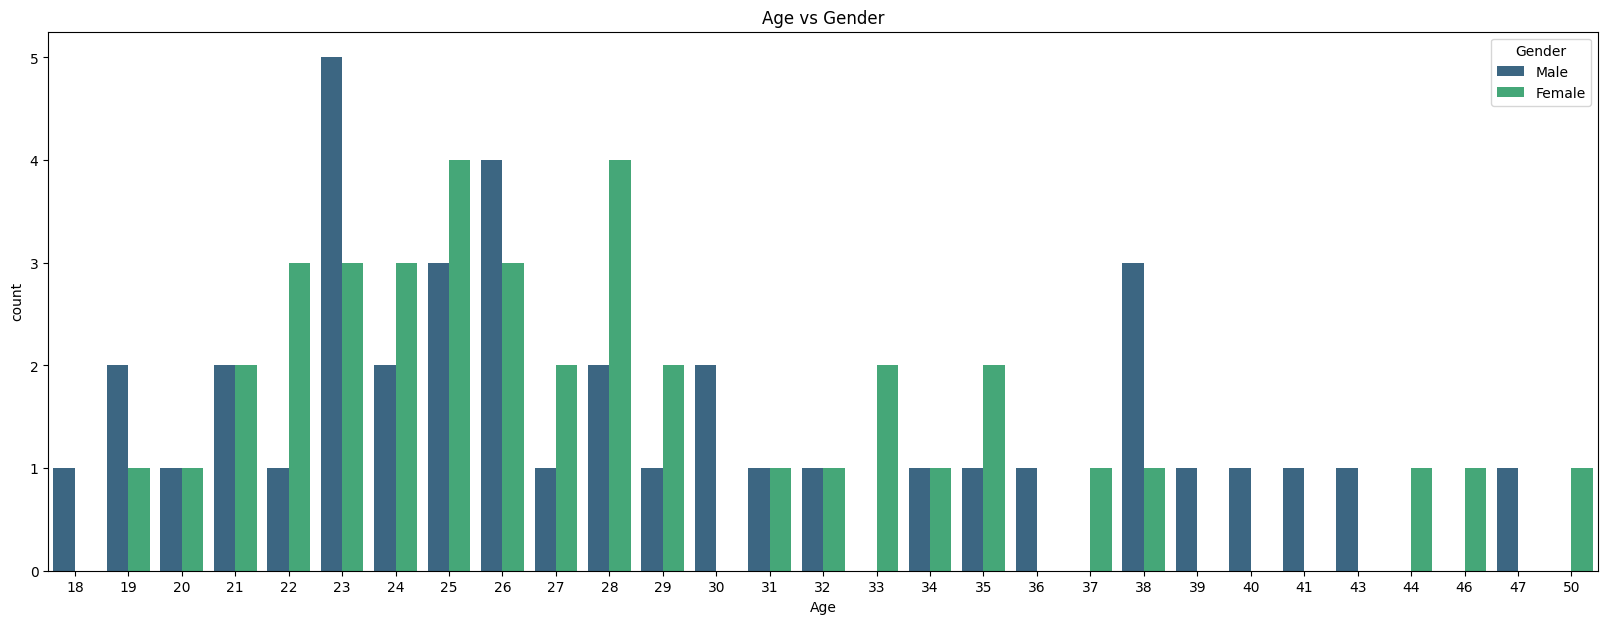

In [19]:
# multivariate analysis using the gender, age marital status and product purchased
plt.figure(figsize=(20,7))
sns.countplot(x='Age', hue='Gender', data=KP281, palette='viridis')
plt.title("Age vs Gender")
plt.show()


The distribution of age among males and females indicates a diverse representation, with individuals ranging from 18 to 50 years old.

In the age group between 23 and 25, there is a noticeable increase in the number of females compared to males.

C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarni

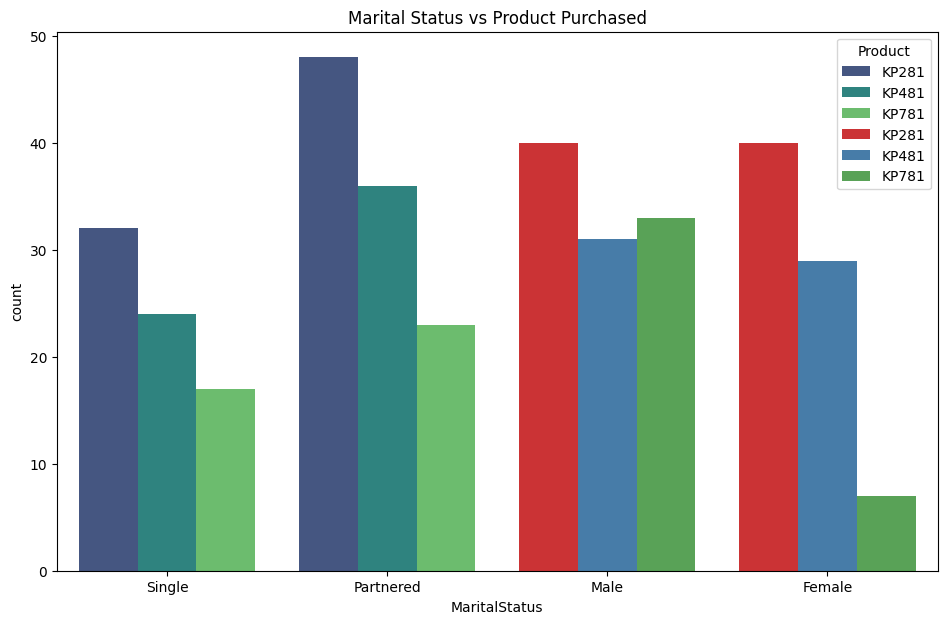

In [20]:
# Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.countplot(x='MaritalStatus', hue='Product', data=df, palette='viridis')
sns.countplot(x='Gender', hue='Product', data=df, palette='Set1')
# sns.countplot(x='Gender', hue='Product', data=df, palette='viridis)
plt.title("Marital Status vs Product Purchased")
plt.show()


In [21]:
(pd.crosstab(df['Product'],df['Gender'],margins = True, normalize = True)*100).T.round(2)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.22,16.11,3.89,42.22
Male,22.22,17.22,18.33,57.78
All,44.44,33.33,22.22,100.00


In [22]:
# MartialStatus wise distribution of each products
crosstab = pd.crosstab(df['Product'],df['MaritalStatus'],margins = True, normalize = True)*100
crosstab.T

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,26.666667,20.000000,12.777778,59.444444
Single,17.777778,13.333333,9.444444,40.555556
All,44.444444,33.333333,22.222222,100.000000


The distribution of product preferences among genders reveals that both females and males show a preference for KP281 and KP481.

Notably, the KP781 treadmill is more popular among males, with a substantial count, while females show a lower preference for this particular product.

For both partnered and single individuals, KP281 is the most preferred treadmill model, followed by KP481 and KP781.

Partnered individuals show a higher overall preference for all three models compared to singles.

In [23]:
# creating bins for age

bins = [14,20,30,40,60]

labels =["Teens","Young Adults","Adults","Over 40s"]

df['AgeCategory'] = pd.cut(df['Age'], bins,labels=labels)

In [24]:
# creating bins for Income

bins_income = [29000, 35000, 60000, 85000, 105000]

labels_income = ['Low Income','Middle-class','Upper-Middle class', 'Wealthy']

df['IncomeSlab'] = pd.cut(df['Income'],bins_income,labels = labels_income)

In [25]:
# AgeCategory wise distribution of each products
crosstab = pd.crosstab(df['Product'],df['AgeCategory']).T
crosstab

Product,KP281,KP481,KP781
AgeCategory,,,
Teens,6,4,0
Young Adults,49,31,30
Adults,19,23,6
Over 40s,6,2,4


C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarni

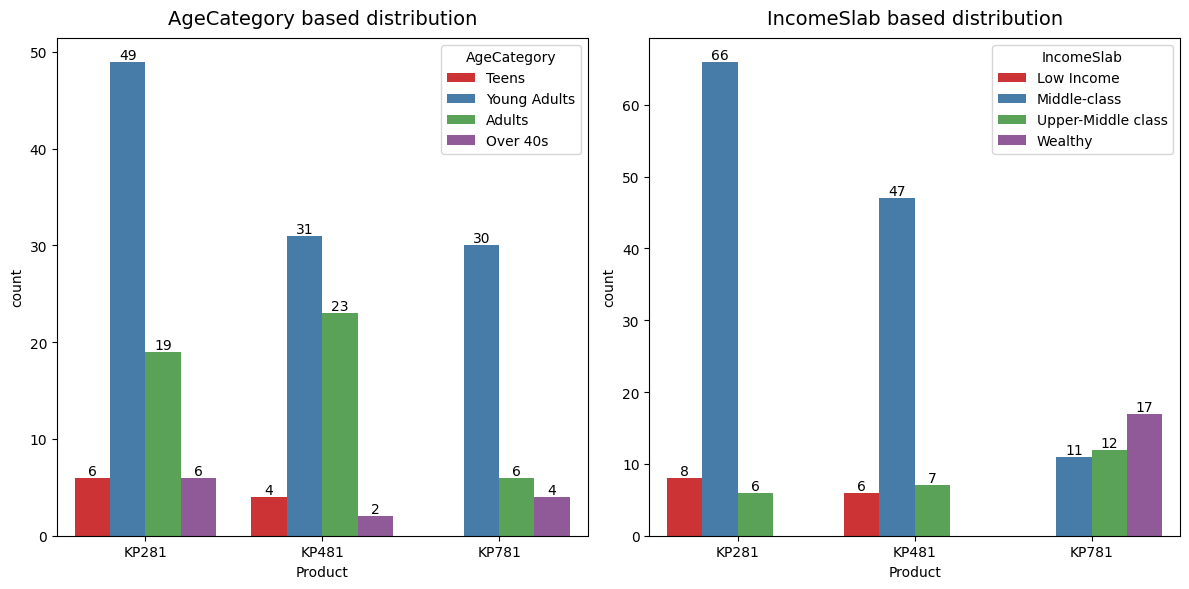

In [26]:
# size of the figure and subplots
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# AgeCategory Plot
label1 = sns.countplot(data=df, x='Product', hue='AgeCategory', palette='Set1', ax=axs[0])
for i in label1.containers:
    label1.bar_label(i)

# IncomeSlab Plot
label2 = sns.countplot(data=df, x='Product', hue='IncomeSlab', palette='Set1', ax=axs[1])
for i in label2.containers:
    label2.bar_label(i)

# titles for subplots
axs[0].set_title("AgeCategory based distribution", pad=10, fontsize=14)
axs[1].set_title("IncomeSlab based distribution", pad=10, fontsize=14)

plt.tight_layout()
plt.show()

### Outliers

In [27]:
def outliers(df, column_name):
    
    # Calculate quartiles and IQR for the specified column
    Q1 = np.percentile(df[column_name], 25)
    Q3 = np.percentile(df[column_name], 75)
    IQR = Q3 - Q1

    # upper bounds for outliers
    upper_band = Q3 + 1.5 * IQR

    # outliers in the specified column
    outliers_df = df[df[column_name] > upper_band]

    return outliers_df

In [28]:
# outliers in Age column

outliers(df,'Age')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeCategory,IncomeSlab
78,KP281,47,Male,16,Partnered,4,3,56850,94,Over 40s,Middle-class
79,KP281,50,Female,16,Partnered,3,3,64809,66,Over 40s,Upper-Middle class
139,KP481,48,Male,16,Partnered,2,3,57987,64,Over 40s,Middle-class
178,KP781,47,Male,18,Partnered,4,5,104581,120,Over 40s,Wealthy
179,KP781,48,Male,18,Partnered,4,5,95508,180,Over 40s,Wealthy


In [29]:
# Count of outliers in Age column
len(outliers(df,'Age'))

5

In [30]:
# outliers in Education column

outliers(df,'Education')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeCategory,IncomeSlab
156,KP781,25,Male,20,Partnered,4,5,74701,170,Young Adults,Upper-Middle class
157,KP781,26,Female,21,Single,4,3,69721,100,Young Adults,Upper-Middle class
161,KP781,27,Male,21,Partnered,4,4,90886,100,Young Adults,Wealthy
175,KP781,40,Male,21,Single,6,5,83416,200,Adults,Upper-Middle class


In [31]:
len(outliers(df,'Education'))

4

In [32]:
# outliers in Usage column

outliers(df,'Usage')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeCategory,IncomeSlab
154,KP781,25,Male,18,Partnered,6,4,70966,180,Young Adults,Upper-Middle class
155,KP781,25,Male,18,Partnered,6,5,75946,240,Young Adults,Upper-Middle class
162,KP781,28,Female,18,Partnered,6,5,92131,180,Young Adults,Wealthy
163,KP781,28,Male,18,Partnered,7,5,77191,180,Young Adults,Upper-Middle class
164,KP781,28,Male,18,Single,6,5,88396,150,Young Adults,Wealthy
166,KP781,29,Male,14,Partnered,7,5,85906,300,Young Adults,Wealthy
167,KP781,30,Female,16,Partnered,6,5,90886,280,Young Adults,Wealthy
170,KP781,31,Male,16,Partnered,6,5,89641,260,Adults,Wealthy
175,KP781,40,Male,21,Single,6,5,83416,200,Adults,Upper-Middle class


In [33]:
len(outliers(df,'Usage')) 

9

In [34]:
# outliers in Income column

outliers(df,'Income')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeCategory,IncomeSlab
159,KP781,27,Male,16,Partnered,4,5,83416,160,Young Adults,Upper-Middle class
160,KP781,27,Male,18,Single,4,3,88396,100,Young Adults,Wealthy
161,KP781,27,Male,21,Partnered,4,4,90886,100,Young Adults,Wealthy
162,KP781,28,Female,18,Partnered,6,5,92131,180,Young Adults,Wealthy
164,KP781,28,Male,18,Single,6,5,88396,150,Young Adults,Wealthy
166,KP781,29,Male,14,Partnered,7,5,85906,300,Young Adults,Wealthy
167,KP781,30,Female,16,Partnered,6,5,90886,280,Young Adults,Wealthy
168,KP781,30,Male,18,Partnered,5,4,103336,160,Young Adults,Wealthy
169,KP781,30,Male,18,Partnered,5,5,99601,150,Young Adults,Wealthy
170,KP781,31,Male,16,Partnered,6,5,89641,260,Adults,Wealthy


In [35]:
len(outliers(df,'Income'))

19

In [36]:
# outliers in Miles column
print(outliers(df,'Miles'),
               "\n",
               len(outliers(df,'Miles')))

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
23    KP281   24  Female         16     Partnered      5        5   44343   
84    KP481   21  Female         14     Partnered      5        4   34110   
142   KP781   22    Male         18        Single      4        5   48556   
148   KP781   24  Female         16        Single      5        5   52291   
152   KP781   25  Female         18     Partnered      5        5   61006   
155   KP781   25    Male         18     Partnered      6        5   75946   
166   KP781   29    Male         14     Partnered      7        5   85906   
167   KP781   30  Female         16     Partnered      6        5   90886   
170   KP781   31    Male         16     Partnered      6        5   89641   
171   KP781   33  Female         18     Partnered      4        5   95866   
173   KP781   35    Male         16     Partnered      4        5   92131   
175   KP781   40    Male         21        Single      6        5   83416   

In [37]:
# outliers in Fitness column

Q1_Fitness = np.percentile(df['Fitness'],25)
Q3_Fitness = np.percentile(df['Fitness'],75)
IQR = Q3_Fitness - Q1_Fitness
lower_band = Q1_Fitness - 1.5*(IQR)

Fitness_outliers = df[df['Fitness'] < lower_band]

Fitness_outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeCategory,IncomeSlab
14,KP281,23,Male,16,Partnered,3,1,38658,47,Young Adults,Middle-class
117,KP481,31,Female,18,Single,2,1,65220,21,Adults,Upper-Middle class


In [38]:
len(Fitness_outliers)

2

In [39]:
# combining all the int columns into a list

columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]

C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\v-pirlapati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to

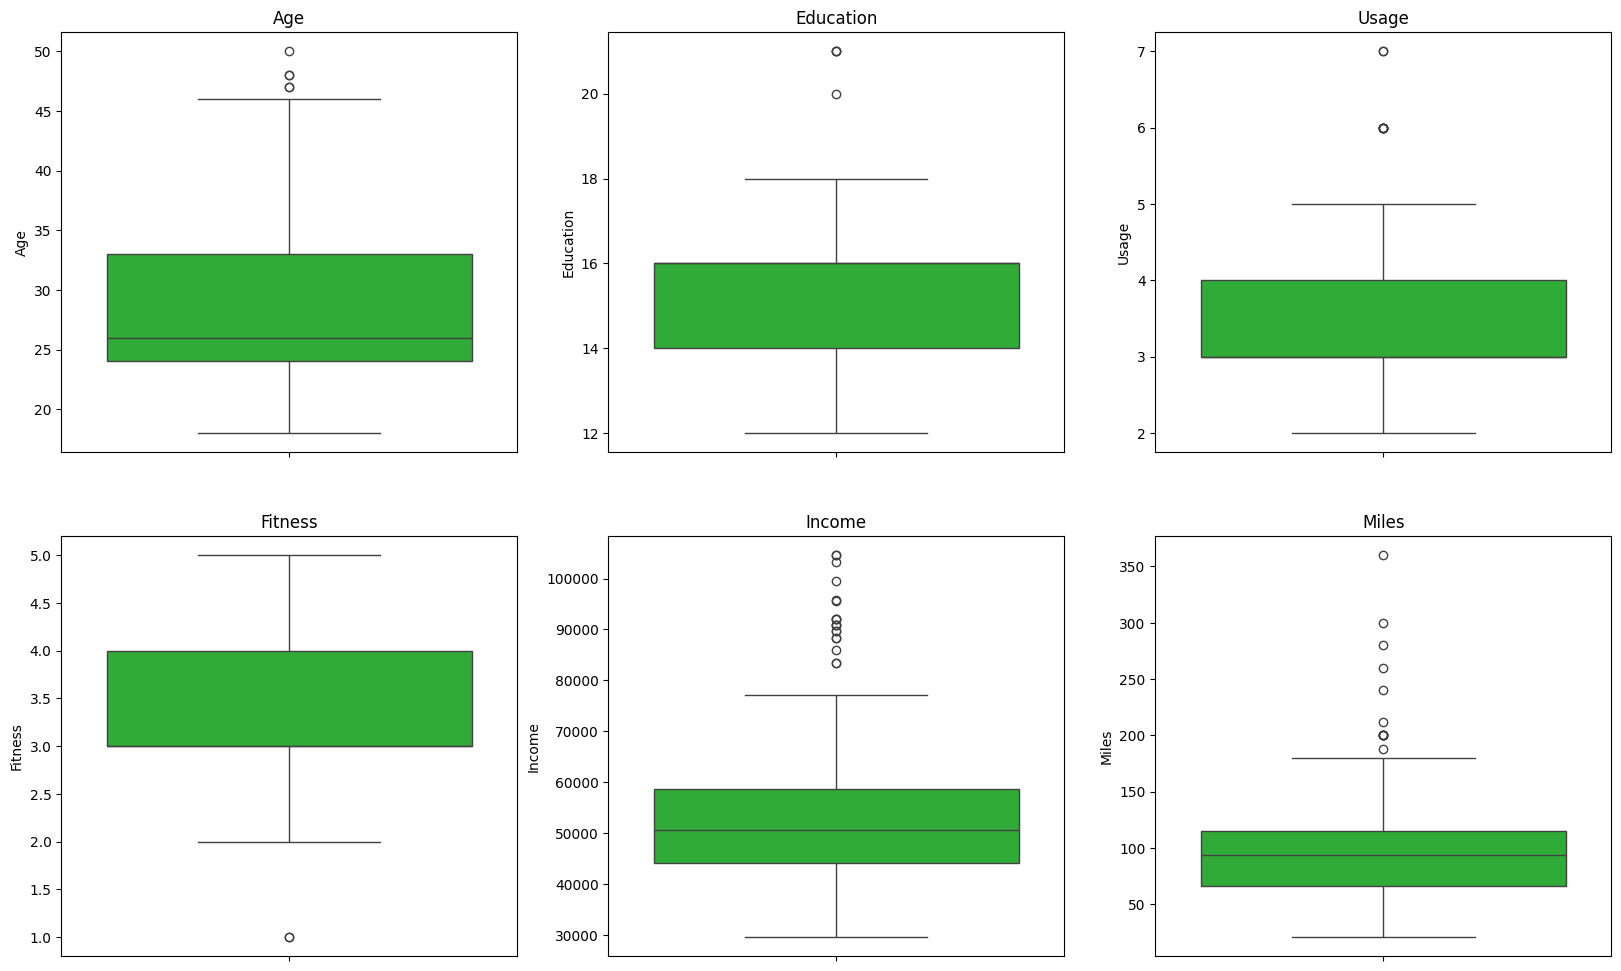

In [40]:
# Plotting the outliers using boxplots

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
for i in range(2):
    for j in range(3):
        variable = columns[i * 3 + j]
        sns.boxplot(ax=axes[i, j], data=df, y=variable, color="#1BBF25")
        axes[i, j].set_title(variable) 
        
plt.show();

Insights:-
Age : Outliers include a few exceptional individuals aged 46 and above.

Education : Outliers include individuals with 20 and 21 years of education.

Usage : Outliers include some dedicated users at 6 and 7 times per week.

Fitness : An outlier is present at a rating of 1.

Income : Outlier include customers having income more than 81,000.

Miles : Outliers include a few individuals exceeding 175 miles.Outliers include a few individuals exceeding 175 miles.

### Marginal Probability of customer buying

In [41]:
product = (df["Product"].value_counts(normalize=True)*100).T.round(2)
product

Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: proportion, dtype: float64

Product KP281 is : 44.44 % (cheapest / entry level product)

Product KP481 is : 33.33 % (intermediate user level product)

Product KP781 is : 22.22 % (Advanced product with ease of use that help in covering longer distance)

In [42]:
mp_of_gender = (pd.crosstab(df['Product'],df['Gender'],margins = True, normalize = True)*100).T.round(2)

mp_of_gender

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.22,16.11,3.89,42.22
Male,22.22,17.22,18.33,57.78
All,44.44,33.33,22.22,100.00


Probability of gender

Probability of Male Customer Purchasing any product is : 57.77 %

Probability of Female Customer Purchasing any product is : 42.22 %


In [43]:
mp_of_marital = (pd.crosstab(df['Product'],df['MaritalStatus'],margins = True, normalize = True)*100).T.round(2)

mp_of_marital

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,26.67,20.00,12.78,59.44
Single,17.78,13.33,9.44,40.56
All,44.44,33.33,22.22,100.00


Probability of MaritalStatus

Probability of Partnered Customer Purchasing any product is : 59.44 %

Probability of Single Customer Purchasing any product is : 40.56 %

In [44]:
mp_of_marital = (pd.crosstab(df['Product'],df['MaritalStatus'],margins = True, normalize = True)*100).T.round(2)

mp_of_marital

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,26.67,20.00,12.78,59.44
Single,17.78,13.33,9.44,40.56
All,44.44,33.33,22.22,100.00


In [45]:
mp_of_Age = (pd.crosstab(df['Product'],df['AgeCategory'],margins = True, normalize = True)*100).T.round(2)

mp_of_Age

Product,KP281,KP481,KP781,All
AgeCategory,,,,
Teens,3.33,2.22,0.00,5.56
Young Adults,27.22,17.22,16.67,61.11
Adults,10.56,12.78,3.33,26.67
Over 40s,3.33,1.11,2.22,6.67
All,44.44,33.33,22.22,100.00


Probability of Teens Purchasing any product is : 5.56 %

Probability of Young Adults Purchasing any product is : 61.11 %

Probability of Adults Purchasing any product is : 26.67 %

Probability of Over 40s customers Purchasing any product is : 6.67 %

In [46]:
mp_of_income = (pd.crosstab(df['Product'],df['IncomeSlab'],margins = True, normalize = True)*100).T.round(2)

mp_of_income

Product,KP281,KP481,KP781,All
IncomeSlab,,,,
Low Income,4.44,3.33,0.00,7.78
Middle-class,36.67,26.11,6.11,68.89
Upper-Middle class,3.33,3.89,6.67,13.89
Wealthy,0.00,0.00,9.44,9.44
All,44.44,33.33,22.22,100.00


Probability of Income

Probability of Low Income customers Purchasing any product is : 7.78 %

Probability of Middle-class customers Purchasing any product is : 68.89 %

Probability of Upper-Middle class customers Purchasing any product is : 13.89 %

Probability of Wealthy customers Purchasing any product is : 9.44 %

### Conditional Probability

In [47]:
cp_of_gender = (pd.crosstab(df['Product'],df['Gender'],margins=True,normalize="columns")*100).T.round(2)

cp_of_gender

Product,KP281,KP481,KP781
Gender,,,
Female,52.63,38.16,9.21
Male,38.46,29.81,31.73
All,44.44,33.33,22.22


Probability (Product | Female)

KP281 | Female = 52.63 %

KP481 | Female = 38.16 %

KP781 | Female = 9.21 %

Probability (Product | Male)

KP281 | male = 38.46 %

KP481 | male = 29.81 %

KP781 | male = 31.73 %

##### Insights:-


Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

KP281 is more recommended for female customers.

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%. )

KP481 product is specifically recommended for Female customers who are intermediate user.

In [48]:
cp_of_marital = (pd.crosstab(df['Product'],df['MaritalStatus'],margins=True,normalize='columns')*100).T.round(2)

cp_of_marital

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,44.86,33.64,21.50
Single,43.84,32.88,23.29
All,44.44,33.33,22.22


Probability (Product | Partnered)

KP281 | Partnered = 44.86 %

KP481 | Partnered = 33.64 %

KP781 | Partnered = 21.50 %

Probability (Product | Single)

KP281 | Single = 43.84 %

KP481 | Single = 32.88 %

KP781 | Single = 23.29 %
Probability (Product | Partnered)

KP281 | Adults = 39.58 %

KP481 | Adults = 47.92 %

KP781 | Adults = 12.50 %

Probability (Product | Single)

KP281 | Over 40s = 50 %

KP481 | Over 40s = 16.67 %

KP781 | Over 40s = 33.33 %

##### Insights:-

Among teens, KP281 is the predominant choice (60%), while KP481 is chosen by 40%. KP781 does not seem to appeal to this age group.

In the young adults category, KP281 has a slightly higher preference (44.55%) compared to KP481 (28.18%) and KP781 (27.27%).

Among adults, there is a balanced distribution. KP481 is the most favored (47.92%), followed by KP281 (39.58%), KP781 with a low preference (12.50%).

Customers over 40 show a clear preference for KP281 (50%), followed by KP781 (33.33%), while KP481 has a lower preference (16.67%).

In [49]:
cp_of_Income = (pd.crosstab(df['Product'],df['IncomeSlab'],margins = True, normalize = 'columns')*100).T.round(2)

cp_of_Income

Product,KP281,KP481,KP781
IncomeSlab,,,
Low Income,57.14,42.86,0.00
Middle-class,53.23,37.90,8.87
Upper-Middle class,24.00,28.00,48.00
Wealthy,0.00,0.00,100.00
All,44.44,33.33,22.22



Probability (Product | Partnered)

KP281 | Low Income = 57.14 %

KP481 | Low Income = 42.86 %

KP781 | Low Income = 0 %

Probability (Product | Single)

KP281 | Middle-class = 53.23 %

KP481 | Middle-class = 37.90 %

KP781 | Middle-class = 8.87 %

Probability (Product | Partnered)

KP281 | Upper-Middle class = 24 %

KP481 | Upper-Middle class = 28 %

KP781 | Upper-Middle class = 48 %

Probability (Product | Single)

KP281 | Wealthy = 0 %

KP481 | Wealthy = 0 %

KP781 | Wealthy = 100 %

##### Insights:-
In the Low-Income category, KP281 is dominant (57.14%), while KP481 is chosen by 42.86%. KP781 doesn't seem to be preferred in this income bracket.

Among the Middle-Class, KP281 remains popular (53.23%), followed by KP481 (37.90%), and KP781 has a lower preference (8.87%).

In the Upper-Middle class,KP781 being the most favored (48.00%), followed by KP481 (28.00%), and KP281 has a lower preference (24.00%).

Among the Wealthy, KP781 is the exclusive choice (100.00%), with KP281 and KP481 having no preference.

### Customer Profiling

#### KP281

- Affordable Entry-Level Choice: KP281 is a budget-friendly option and the best-selling product.
- Popularity Among Beginners: It's favored by entry-level customers, both male and female.
- Usage Patterns: Typically used 3 to 4 times a week, covering 70 to 90 miles.
- Fitness Rating: Most customers rate their fitness as average.
- Demographic Preferences: Attracts younger to elder beginners, especially preferred by single females and partnered males.
- Income Range: Preferred by customers with incomes between 39K to 53K.

#### KP481

- Intermediate Level Product: KP481 is an intermediate-level treadmill.
- Usage Characteristics: Customers cover 70 to 130 miles per week, with usage averaging 3 days.
- Fitness and Mileage Focus: Fitness level varies from bad to average, and the focus is on covering more miles.
- Demographic Preferences: More popular among females, recommended for intermediate female users.
- Age Groups: Attracts customers across different age groups - teens, adults, and middle-aged.
- Income and Relationship Preferences: Average income around 49K, more preferred by partnered customers.

#### KP781

- Advanced and High-Priced: KP781 is an advanced and higher-priced product.
- Distance and Usage: Customers cover 120 to 200+ miles per week, using it 4 to 5 times.
- Fitness Rating: Users rate their fitness as excellent.
- Demographic Insights: Preferred by middle to higher age groups, especially single individuals with higher exercise levels.
- Gender Preference: More favored by males, especially those with extensive exercise routines.
- Income Influence: Preferred by higher-income individuals, correlated with higher education.
- Experience Factor: Attracts customers familiar with previous aerofit products.
- Partnered Preference: Partnered females show a preference for KP781.

### Recommendations

1. **Targeted Marketing for Female Cus**
Given the low engagement of females exrcise equipment, it is recommended to launch a targeted marketing campaign to encourage and promote female participation in fitness activities.

2. **Strategic Pricing for KP281 and K**
   Analyzing customer preferences, dvised to position KP281 and KP481 treadmills as budget-friendly options, particularly catering to customers with an annual income in the range of 39K - 53K dollars.

3. **Premium Marketing for KP781:**
   Capitalize on the advanced features the KP781 treadmill by positioning it as a premium product suitable for professionals and athletes. Implement marketing strategies involving influencers and international athletes to enhance product visibility.

4. **Market Expansion Research:**
   Conduct thorough research to ask feasibility of expanding the market beyond the age of 50. Explore potential health benefits and drawbacks to tailor marketing strategies effectively.

5. **Customer Support and Upgrade Recoiognitons:**
   Establish a robust customer supptem and implement recommendations for users to consider upgrading from lower treadmill versions to higher-level models based on their consistent usage patterns.

6. **Targeted Promotion of KP781 for Customers:**
   Promote the KP781 model specific female customers who engage in extensive exercise routines. Provide user-friendly guidance to enhance the appeal of this advanced treadmill.

7. **Age-Specific Marketing for KP781:**
    Tailor marketing efforts for individuals above 40 years, positioning the KP781 as a suitable choice. Emphasize health benefits and usability features to attract this demographic.